🎯 Desafio dia 97 — Finanças Pessoais Mensais

📂 Dataset: desafio_dia_97_financas_pessoais.csv

🔍 Contexto: Um estudo sobre comportamento financeiro analisou a evolução mensal da renda e dos gastos de diversos indivíduos. Cada linha representa os valores de um mês específico para uma pessoa.

🛠️ Tarefas do desafio
🧹 Tratamento de dados

    Verifique se há valores ausentes nas colunas salario e gastos.
    Caso existam, preencha:

        salario com a média do indivíduo (id_pessoa)

        gastos com a mediana geral

    Crie uma nova coluna chamada economia_mensal, calculada como:

    economia_mensal = salario - gastos

📊 Análise geral

    Qual pessoa (id_pessoa) teve a maior média de economia mensal ao longo do período?

    Qual foi a categoria de despesa mais comum nos meses em que os gastos superaram o salário?

📈 Visualização de dados

    Escolha uma id_pessoa aleatória. Faça um gráfico de linha mostrando:

        A evolução do salario, gastos e economia_mensal ao longo do tempo (mes).

        Adicione uma linha de tendência da economia (rolling mean de 3 meses).

🤖 Machine Learning — Classificação leve

    Crie uma nova coluna binária risco_financeiro:

        1 se economia_mensal < 0 (gasta mais do que ganha)

        0 caso contrário

    Modele o risco financeiro com LogisticRegression usando como preditores:

        salario, gastos, e one-hot encoding da categoria_despesa_principal

    Avalie o modelo com:

        accuracy_score

        confusion_matrix

        classification_report

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
df = pd.read_csv("desafio_dia_97_financas_pessoais.csv")
df.head()

,mes,id_pessoa,salario,gastos,categoria_despesa_principal
0,2023-01,7001,1748.81,1980.22,Alimentação
1,2023-02,7001,3070.40,2952.00,Transporte
2,2023-03,7001,2753.61,2819.97,Aluguel
3,2023-04,7001,4506.85,2140.50,Alimentação
4,2023-05,7001,2908.88,2593.38,Educação


In [47]:
#Verifique se há valores ausentes nas colunas salario e gastos. Caso existam, preencha:
print("valores ausentes na coluna salario: ", df["salario"].isna().sum())
print("valores ausentes na coluna gastos:", df["gastos"].isna().sum())
df["gastos"] = df["gastos"].fillna(df["gastos"].median())
print("valores ausentes na coluna gastos após o tratamento:", df["gastos"].isna().sum())

valores ausentes na coluna salario:  0
valores ausentes na coluna gastos: 100
valores ausentes na coluna gastos após o tratamento: 0


In [48]:
#Crie uma nova coluna chamada economia_mensal, calculada como: economia_mensal = salario - gastos
df["economia_mensal"] = df["salario"] - df["gastos"]
df.head()

,mes,id_pessoa,salario,gastos,categoria_despesa_principal,economia_mensal
0,2023-01,7001,1748.81,1980.22,Alimentação,-231.41
1,2023-02,7001,3070.40,2952.00,Transporte,118.40
2,2023-03,7001,2753.61,2819.97,Aluguel,-66.36
3,2023-04,7001,4506.85,2140.50,Alimentação,2366.35
4,2023-05,7001,2908.88,2593.38,Educação,315.50


In [49]:
#Qual pessoa (id_pessoa) teve a maior média de economia mensal ao longo do período?
pessoa_economia_mensal = df.groupby("id_pessoa")["economia_mensal"].mean().sort_values(ascending=False)
print(pessoa_economia_mensal.head(1))

id_pessoa
7192    1894.965833
Name: economia_mensal, dtype: float64


In [50]:
#Qual foi a categoria de despesa mais comum nos meses em que os gastos superaram o salário?
maiores_gastos = df[df["economia_mensal"] < 0]
despesa_meses_com_gastos = maiores_gastos.groupby("categoria_despesa_principal").size().sort_values(ascending=False)
print(despesa_meses_com_gastos)

categoria_despesa_principal
Aluguel        122
Educação       109
Alimentação    103
Lazer          101
Transporte      87
dtype: int64


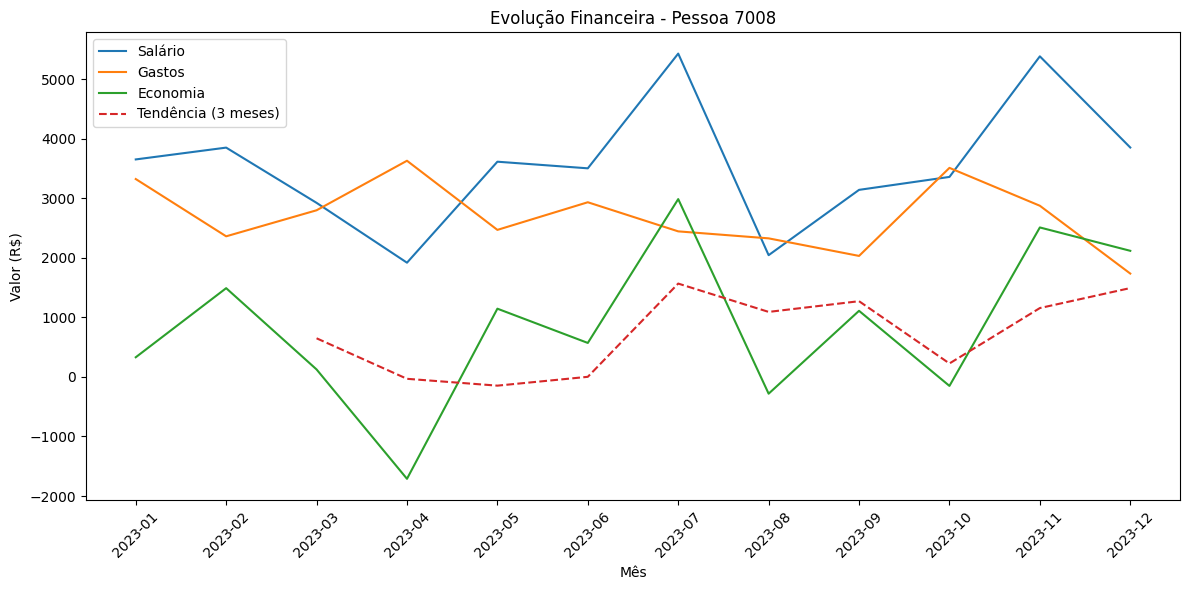

In [51]:
#Escolha uma id_pessoa aleatória. Faça um gráfico de linha mostrando:
# A evolução do salario, gastos e economia_mensal ao longo do tempo (mes).
# Adicione uma linha de tendência da economia (rolling mean de 3 meses).

pessoa = df["id_pessoa"].sample(1).values[0]
df_pessoa = df[df["id_pessoa"] == pessoa].sort_values("mes")

plt.figure(figsize=(12,6))
plt.plot(df_pessoa["mes"], df_pessoa["salario"], label="Salário")
plt.plot(df_pessoa["mes"], df_pessoa["gastos"], label="Gastos")
plt.plot(df_pessoa["mes"], df_pessoa["economia_mensal"], label="Economia")

plt.plot(df_pessoa["mes"], df_pessoa["economia_mensal"].rolling(3).mean(), label="Tendência (3 meses)", linestyle="--")

plt.title(f"Evolução Financeira - Pessoa {pessoa}")
plt.xlabel("Mês")
plt.ylabel("Valor (R$)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
#Crie uma nova coluna binária risco_financeiro:
df["risco_financeiro"] = (df["economia_mensal"] < 0).astype(int)

#Modele o risco financeiro com LogisticRegression usando como preditores:
X = df[["salario", "gastos", "categoria_despesa_principal"]]
y = df["risco_financeiro"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[561   0]
 [  0 159]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       159

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

